In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import pydot
from io import StringIO
from sklearn.tree import export_graphviz

%matplotlib inline

### Data exploration and analysis 

In [ ]:
#read the dataset
df = pd.read_csv('CaseStudy1-data/CaseStudyData.csv')
df.shape

In [4]:
df.head()

,PurchaseID,PurchaseTimestamp,PurchaseDate,Auction,VehYear,Make,Color,Transmission,WheelTypeID,WheelType,...,MMRCurrentRetailCleanPrice,MMRCurrentRetailRatio,PRIMEUNIT,AUCGUART,VNST,VehBCost,IsOnlineSale,WarrantyCost,ForSale,IsBadBuy
0,0,1253232000,18/09/2009 10:00,OTHER,2008.0,DODGE,RED,AUTO,2,Covers,...,12505,0.941783287,?,?,NC,7800,0,920.0,Yes,0
1,1,1253232000,18/09/2009 10:00,OTHER,2008.0,DODGE,RED,AUTO,2,Covers,...,10571,0.922618485,?,?,NC,7800,0,834.0,Yes,0
2,2,1253232000,18/09/2009 10:00,OTHER,2008.0,CHRYSLER,SILVER,AUTO,2,Covers,...,9932,0.935159082,?,?,NC,7800,0,834.0,Yes,0
3,3,1253232000,18/09/2009 10:00,OTHER,2008.0,CHEVROLET,RED,AUTO,2,Covers,...,8739,0.931456688,?,?,NC,6000,0,671.0,Yes,0
4,4,1253232000,18/09/2009 10:00,OTHER,2008.0,DODGE,SILVER,AUTO,2,Covers,...,9908,0.906943884,?,?,NC,7800,0,920.0,Yes,0


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41476 entries, 0 to 41475
Data columns (total 31 columns):
PurchaseID                           41476 non-null int64
PurchaseTimestamp                    41476 non-null int64
PurchaseDate                         41476 non-null object
Auction                              41432 non-null object
VehYear                              41432 non-null float64
Make                                 41432 non-null object
Color                                41432 non-null object
Transmission                         41432 non-null object
WheelTypeID                          41432 non-null object
WheelType                            41380 non-null object
VehOdo                               41432 non-null float64
Nationality                          41432 non-null object
Size                                 41432 non-null object
TopThreeAmericanName                 41432 non-null object
MMRAcquisitionAuctionAveragePrice    41416 non-null object
MMRAcq

In [6]:
### finding the attibutes of each feature
dataAttributes=pd.DataFrame([df.columns]).transpose()
dataAttributes.columns = ['Features']
series = ['continuous', 'continuous', 'date', 'nominal','continuous', 'nominal', 'nominal', 'nominal', 'integers', 'nominal','continuous', \
         "nominal", 'ordinal','nominal','continuous','continuous','continuous','continuous','continuous','continuous','continuous', \
         'continuous','comtinuous','binary','nominal','nominal','continuous','binary','continuous','binary','binary']
dataAttributes['Attributes'] = pd.Series(series)


#### Copying the data

In [7]:
# before exploring the data, we will make a copy of the original data named df1
df1=df

#### Fix any data quality problems

In [8]:
# find the missing data for all features
MissingData = df1.isnull().sum()
print(MissingData.sort_values(ascending = False))

MMRCurrentRetailRatio                360
MMRAcquisitonRetailCleanPrice        149
WheelType                             96
MMRCurrentRetailCleanPrice            67
MMRCurrentRetailAveragePrice          67
MMRAcquisitionAuctionAveragePrice     60
MMRAcquisitionAuctionCleanPrice       47
MMRCurrentAuctionAveragePrice         47
MMRCurrentAuctionCleanPrice           47
MMRAcquisitionRetailAveragePrice      47
PRIMEUNIT                             44
AUCGUART                              44
VehYear                               44
Make                                  44
Color                                 44
Transmission                          44
WheelTypeID                           44
WarrantyCost                          44
VehOdo                                44
Nationality                           44
Size                                  44
TopThreeAmericanName                  44
IsOnlineSale                          44
VehBCost                              44
VNST            

In [9]:
# there are 16 columns that are uniformly has missing data
# drop the missing values of subset columns total 44 instances
df1=df1.dropna(subset=['PRIMEUNIT', 'AUCGUART','VehYear','Make','Color','Transmission','WheelTypeID','WarrantyCost', \
               'VehOdo','Nationality','Size','TopThreeAmericanName','IsOnlineSale','VehBCost','VNST','Auction'])

In [10]:
MissingData = df1.isnull().sum()
print(MissingData.sort_values(ascending = False))

MMRCurrentRetailRatio                316
MMRAcquisitonRetailCleanPrice        105
WheelType                             52
MMRCurrentRetailAveragePrice          23
MMRCurrentRetailCleanPrice            23
MMRAcquisitionAuctionAveragePrice     16
MMRCurrentAuctionCleanPrice            3
MMRCurrentAuctionAveragePrice          3
MMRAcquisitionRetailAveragePrice       3
MMRAcquisitionAuctionCleanPrice        3
VehYear                                0
Make                                   0
Color                                  0
Auction                                0
VehOdo                                 0
PurchaseDate                           0
PurchaseTimestamp                      0
Transmission                           0
WheelTypeID                            0
IsBadBuy                               0
Nationality                            0
Size                                   0
TopThreeAmericanName                   0
ForSale                                0
PRIMEUNIT       

#### Auction 

In [11]:
print(df1['Auction'].unique())
print(df1['Auction'].value_counts())

['OTHER' 'MANHEIM' 'ADESA']
MANHEIM    22168
ADESA      11086
OTHER       8178
Name: Auction, dtype: int64


In [12]:
print(df1['Auction'].value_counts())
print("\n\nNormalised count (percentage) of auction company with kick value prediction")
print(df.groupby(['IsBadBuy'])['Auction'].value_counts(normalize=True))

MANHEIM    22168
ADESA      11086
OTHER       8178
Name: Auction, dtype: int64


Normalised count (percentage) of auction company with kick value prediction
IsBadBuy  Auction
0         MANHEIM    0.541825
          ADESA      0.258657
          OTHER      0.199518
1         MANHEIM    0.489469
          ADESA      0.327493
          OTHER      0.183038
Name: Auction, dtype: float64


Text(0.5,1,'Auction company associated with kick ')

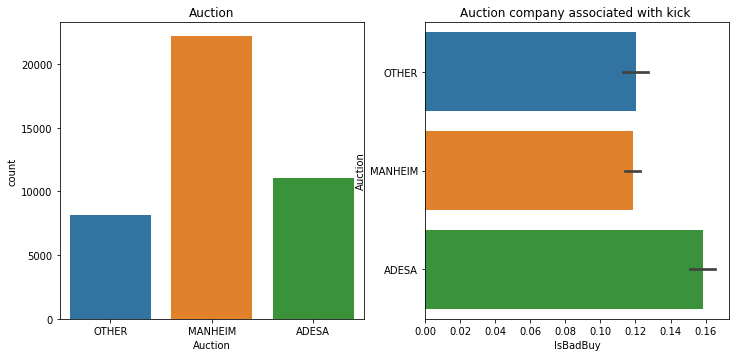

In [13]:
plt.figure(figsize=(12,12))
plt.subplot(221)
dg = sns.countplot(data=df1, x='Auction')
plt.title("Auction")

plt.subplot(222)
dg = sns.barplot(data=df1, y='Auction', x='IsBadBuy', )
plt.title("Auction company associated with kick ")

#### VehYear

In [14]:
print(df1['VehYear'].unique())
print(df1['VehYear'].value_counts())

[2008. 2007. 2004. 2006. 2005. 2003. 2009. 2001. 2002. 2010.]
2006.0    9630
2005.0    8682
2007.0    6514
2004.0    5792
2008.0    4177
2003.0    3554
2002.0    1879
2001.0     816
2009.0     387
2010.0       1
Name: VehYear, dtype: int64


In [15]:
print(df1['VehYear'].value_counts())
print("\n\nNormalised count (percentage) of VehYear with kick value prediction")
print(df.groupby(['IsBadBuy'])['VehYear'].value_counts(normalize=True))

2006.0    9630
2005.0    8682
2007.0    6514
2004.0    5792
2008.0    4177
2003.0    3554
2002.0    1879
2001.0     816
2009.0     387
2010.0       1
Name: VehYear, dtype: int64


Normalised count (percentage) of VehYear with kick value prediction
IsBadBuy  VehYear
0         2006.0     0.240136
          2005.0     0.207447
          2007.0     0.166662
          2004.0     0.133696
          2008.0     0.108964
          2003.0     0.078049
          2002.0     0.038900
          2001.0     0.015915
          2009.0     0.010203
          2010.0     0.000028
1         2005.0     0.223672
          2004.0     0.180801
          2006.0     0.180615
          2003.0     0.137745
          2007.0     0.093756
          2002.0     0.088723
          2008.0     0.046039
          2001.0     0.045107
          2009.0     0.003541
Name: VehYear, dtype: float64


D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0.5,1,'VehYear associated with kick ')

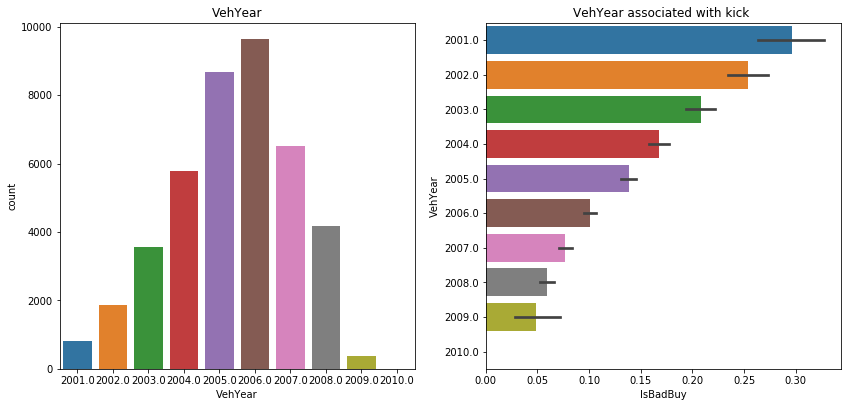

In [16]:
df1['VehYear'] = pd.Categorical(df1['VehYear'])
plt.figure(figsize=(14,14))
plt.subplot(221)
dg = sns.countplot(data=df1, x='VehYear')
plt.title("VehYear")

plt.subplot(222)
dg = sns.barplot(data=df1, y='VehYear', x='IsBadBuy', )
plt.title("VehYear associated with kick ")

#### Make

In [17]:
print(df1['Make'].unique())

['DODGE' 'CHRYSLER' 'CHEVROLET' 'PONTIAC' 'MITSUBISHI' 'MAZDA' 'SUZUKI'
 'KIA' 'SATURN' 'TOYOTA' 'FORD' 'BUICK' 'JEEP' 'NISSAN' 'INFINITI'
 'HYUNDAI' 'GMC' 'VOLKSWAGEN' 'HONDA' 'MERCURY' 'OLDSMOBILE' 'ACURA'
 'CADILLAC' 'ISUZU' 'LINCOLN' 'SUBARU' 'SCION' 'LEXUS' 'MINI' 'VOLVO']


In [18]:
print(df1['Make'].value_counts())
print("\n\nNormalised count (percentage) of Make with kick value prediction")
print(df1.groupby(['IsBadBuy'])['Make'].value_counts(normalize=True))

CHEVROLET     9548
DODGE         7385
FORD          6458
CHRYSLER      5259
PONTIAC       2355
KIA           1337
SATURN        1245
NISSAN        1186
JEEP           985
HYUNDAI        957
SUZUKI         842
TOYOTA         664
MITSUBISHI     569
MAZDA          532
MERCURY        527
BUICK          413
GMC            351
HONDA          263
OLDSMOBILE     146
ISUZU           82
SCION           77
VOLKSWAGEN      73
LINCOLN         54
INFINITI        27
ACURA           19
MINI            19
CADILLAC        17
SUBARU          17
LEXUS           13
VOLVO           12
Name: Make, dtype: int64


Normalised count (percentage) of Make with kick value prediction
IsBadBuy  Make      
0         CHEVROLET     0.238085
          DODGE         0.182078
          FORD          0.149361
          CHRYSLER      0.126459
          PONTIAC       0.057476
          KIA           0.032329
          SATURN        0.029390
          NISSAN        0.027782
          JEEP          0.022874
          HYUNDAI   

Text(0.5,1,'Make associated with kick ')

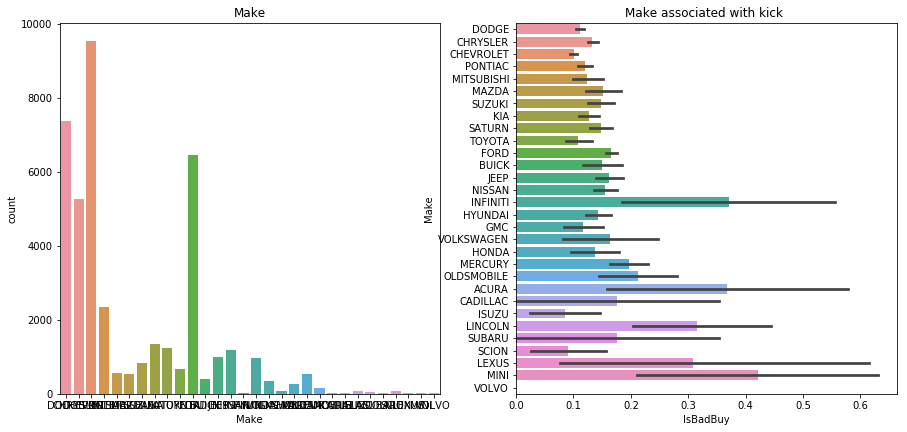

In [19]:
plt.figure(figsize=(15,15))
plt.subplot(221)
dg = sns.countplot(data=df1, x='Make')
plt.title("Make")

plt.subplot(222)
dg = sns.barplot(data=df1, y='Make', x='IsBadBuy', )
plt.title("Make associated with kick ")

Color

In [20]:
print(df1['Color'].unique())

['RED' 'SILVER' 'WHITE' 'BLUE' 'BEIGE' 'BLACK' 'GREEN' 'GREY' 'NOT AVAIL'
 'GOLD' 'PURPLE' 'ORANGE' 'MAROON' 'YELLOW' 'OTHER' 'BROWN' '?']


In [21]:
# Replace '?', 'NOT AVAIL' into 'SILVER'
df1['Color'] = df1['Color'].replace('?', 'SILVER')
df1['Color'] = df1['Color'].replace('NOT AVAIL', 'SILVER')
print(df1['Color'].unique())

['RED' 'SILVER' 'WHITE' 'BLUE' 'BEIGE' 'BLACK' 'GREEN' 'GREY' 'GOLD'
 'PURPLE' 'ORANGE' 'MAROON' 'YELLOW' 'OTHER' 'BROWN']


D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
print(df1['Color'].value_counts())
print("\n\nNormalised count (percentage) of Color with kick value prediction")
print(df1.groupby(['IsBadBuy'])['Color'].value_counts(normalize=True))

SILVER    8612
WHITE     6890
BLUE      5855
BLACK     4392
GREY      4248
RED       3661
GOLD      3059
GREEN     1796
MAROON    1039
BEIGE      894
ORANGE     255
BROWN      249
PURPLE     205
YELLOW     141
OTHER      136
Name: Color, dtype: int64


Normalised count (percentage) of Color with kick value prediction
IsBadBuy  Color 
0         SILVER    0.206865
          WHITE     0.166607
          BLUE      0.142318
          BLACK     0.107827
          GREY      0.103446
          RED       0.087864
          GOLD      0.072144
          GREEN     0.042865
          MAROON    0.025148
          BEIGE     0.021405
          ORANGE    0.006377
          BROWN     0.005822
          PURPLE    0.004686
          OTHER     0.003327
          YELLOW    0.003299
1         SILVER    0.214539
          WHITE     0.164212
          BLUE      0.134576
          GREY      0.096365
          BLACK     0.093756
          RED       0.091705
          GOLD      0.085182
          GREEN     0.0465

     Color  IsBadBuy  count
0    BEIGE         0    772
1    BEIGE         1    122
2    BLACK         0   3889
3    BLACK         1    503
4     BLUE         0   5133
5     BLUE         1    722
6    BROWN         0    210
7    BROWN         1     39
8     GOLD         0   2602
9     GOLD         1    457
10   GREEN         0   1546
11   GREEN         1    250
12    GREY         0   3731
13    GREY         1    517
14  MAROON         0    907
15  MAROON         1    132
16  ORANGE         0    230
17  ORANGE         1     25
18   OTHER         0    120
19   OTHER         1     16
20  PURPLE         0    169
21  PURPLE         1     36
22     RED         0   3169
23     RED         1    492
24  SILVER         0   7461
25  SILVER         1   1151
26   WHITE         0   6009
27   WHITE         1    881
28  YELLOW         0    119
29  YELLOW         1     22


Color,BEIGE,BLACK,BLUE,BROWN,GOLD,GREEN,GREY,MAROON,ORANGE,OTHER,PURPLE,RED,SILVER,WHITE,YELLOW
IsBadBuy,,,,,,,,,,,,,,,
0,772,3889,5133,210,2602,1546,3731,907,230,120,169,3169,7461,6009,119
1,122,503,722,39,457,250,517,132,25,16,36,492,1151,881,22


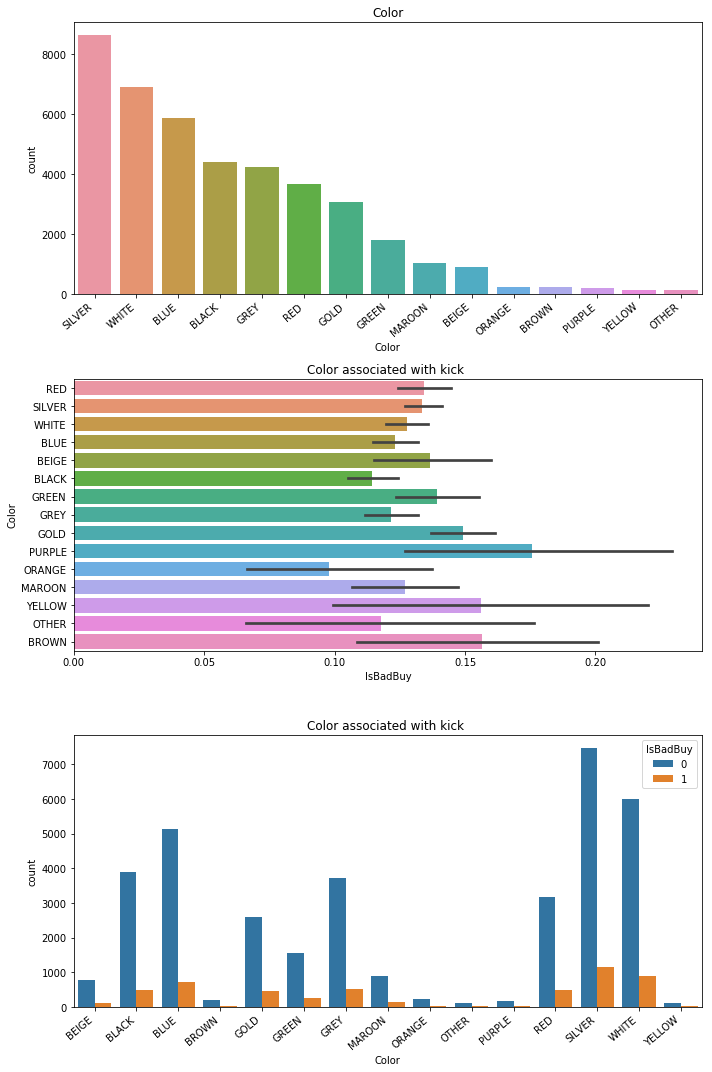

In [23]:
#print(df1.groupby(['IsBadBuy'])['Color'].value_counts(normalize=True))
test = pd.DataFrame({'count': df1.groupby(['Color', 'IsBadBuy']).size()}).reset_index()
print(test)

plt.figure(figsize=(10,15))
plt.subplot(3,1,1)
Color_Countplot = sns.countplot(data=df1, x='Color', order=df1['Color'].value_counts().index)
Color_Countplot.set_xticklabels(Color_Countplot.get_xticklabels(), rotation=40, ha="right")
plt.title("Color")

plt.subplot(3,1,2)
Color_barplot = sns.barplot(data=df1, y='Color', x='IsBadBuy')
plt.title("Color associated with kick ")

plt.subplot(3,1,3)
test_plot = sns.barplot(data=test, x='Color', y='count', hue='IsBadBuy')
test_plot.set_xticklabels(test_plot.get_xticklabels(), rotation=40, ha="right")
plt.title("Color associated with kick ")

plt.tight_layout()

y =df1.groupby(['Color','IsBadBuy']).size().unstack('Color',fill_value=0)
y

#### Transmission

In [24]:
print(df1['Transmission'].unique())

['AUTO' 'MANUAL' 'Manual' '?']


In [25]:
#Replace Manual => MANUAL
#Replace by majority since data is categorical
#Replace ? => AUTO
df1['Transmission'] = df1['Transmission'].replace('?', 'AUTO')
df1['Transmission'] = df1['Transmission'].replace('Manual', 'MANUAL')
print(df1['Transmission'].unique())

['AUTO' 'MANUAL']


D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [26]:
print(df1['Transmission'].value_counts())
print("\n\nNormalised count (percentage) of Transmission with kick value prediction")
print(df1.groupby(['IsBadBuy'])['Transmission'].value_counts(normalize=True))

AUTO      39936
MANUAL     1496
Name: Transmission, dtype: int64


Normalised count (percentage) of Transmission with kick value prediction
IsBadBuy  Transmission
0         AUTO            0.963512
          MANUAL          0.036488
1         AUTO            0.966449
          MANUAL          0.033551
Name: Transmission, dtype: float64


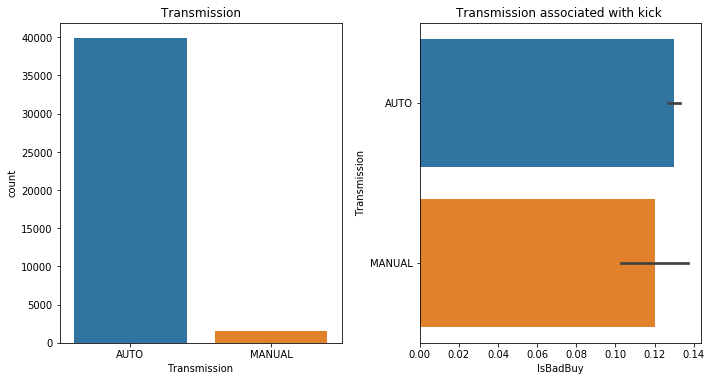

In [27]:
plt.figure(figsize=(10,10))
plt.subplot(221)
dg = sns.countplot(data=df1, x='Transmission',)
plt.title("Transmission")

plt.subplot(222)
dg = sns.barplot(data=df1, y='Transmission', x='IsBadBuy', )
plt.title("Transmission associated with kick ")
plt.tight_layout()

#### WheelTypeID

In [28]:
print(df1['WheelTypeID'].unique())

['2' '1' '?' '3' '0']


In [29]:
#Replace by majority since data is categorical
df1['WheelTypeID'] = df1['WheelTypeID'].replace('?', '1')
df1['WheelTypeID'] = pd.Categorical(df1['WheelTypeID'])
print(df1['WheelTypeID'].unique())

[2, 1, 3, 0]
Categories (4, object): [2, 1, 3, 0]


D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
print(df1['WheelTypeID'].value_counts())
print("\n\nNormalised count (percentage) of auction company with kick value prediction")
print(df1.groupby(['IsBadBuy'])['WheelTypeID'].value_counts(normalize=True))

1    22201
2    18791
3      437
0        3
Name: WheelTypeID, dtype: int64


Normalised count (percentage) of auction company with kick value prediction
IsBadBuy  WheelTypeID
0         1              0.511770
          2              0.477667
          3              0.010508
          0              0.000055
1         1              0.697670
          2              0.291333
          3              0.010811
          0              0.000186
Name: WheelTypeID, dtype: float64


  WheelTypeID  IsBadBuy  count
0           0         0      2
1           0         1      1
2           1         0  18458
3           1         1   3743
4           2         0  17228
5           2         1   1563
6           3         0    379
7           3         1     58


Text(0.5,1,'WheelTypeID associated with kick ')

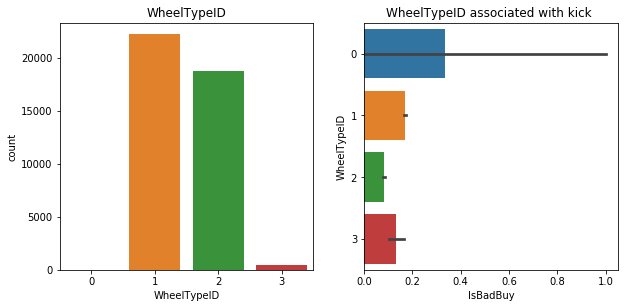

In [31]:
test = pd.DataFrame({'count': df1.groupby(['WheelTypeID', 'IsBadBuy']).size()}).reset_index()
print(test)

plt.figure(figsize=(10,10))
plt.subplot(221)
dg = sns.countplot(data=df1, x='WheelTypeID')
plt.title("WheelTypeID")

plt.subplot(222)
dg = sns.barplot(data=df1, y='WheelTypeID', x='IsBadBuy', )
plt.title("WheelTypeID associated with kick ")

#### WheelType

In [32]:
print(df1['WheelType'].unique())

['Covers' 'Alloy' '?' 'Special' nan]


In [33]:
#Replace nan value => ALLOY
#Replace ? => ALLOY
df1['WheelType'] = df1['WheelType'].replace(np.nan, 'Alloy')
df1['WheelType'] = df1['WheelType'].replace('?', 'Alloy')
print(df1['WheelType'].isnull().values.sum())

0


D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [34]:
print(df1['WheelType'].value_counts())
print("\n\nNormalised count (percentage) of auction company with kick value prediction")
print(df1.groupby(['IsBadBuy'])['WheelType'].value_counts(normalize=True))

Alloy      22235
Covers     18761
Special      436
Name: WheelType, dtype: int64


Normalised count (percentage) of auction company with kick value prediction
IsBadBuy  WheelType
0         Alloy        0.512518
          Covers       0.477001
          Special      0.010480
1         Alloy        0.698975
          Covers       0.290214
          Special      0.010811
Name: WheelType, dtype: float64


Text(0.5,1,'WheelType associated with kick ')

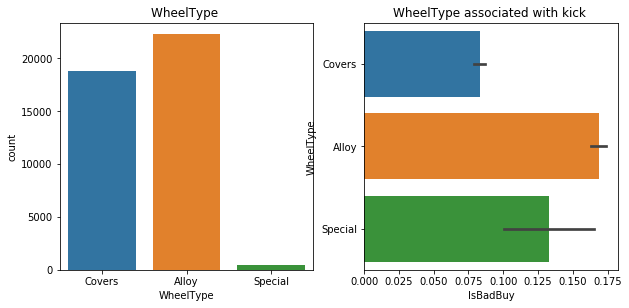

In [35]:
plt.figure(figsize=(10,10))
plt.subplot(221)
dg = sns.countplot(data=df1, x='WheelType')
plt.title("WheelType ")

plt.subplot(222)
dg = sns.barplot(data=df1, y='WheelType', x='IsBadBuy', )
plt.title("WheelType associated with kick ")

#### VehOdo 

In [36]:
print(df1['VehOdo'].unique())

[51099. 48542. 46318. ... 65399. 45234. 66855.]


In [37]:
print(df1['VehOdo'].value_counts(bins=30))

(64559.267, 80554.833]            16562
(80554.833, 96550.4]              11409
(48563.7, 64559.267]               9403
(32568.133, 48563.7]               3023
(96550.4, 112545.967]               758
(16572.567, 32568.133]              260
(97.13199999999999, 16572.567]       14
(112545.967, 128541.533]              2
(464448.433, 480444.0]                1
(320488.333, 336483.9]                0
(144537.1, 160532.667]                0
(432457.3, 448452.867]                0
(416461.733, 432457.3]                0
(400466.167, 416461.733]              0
(384470.6, 400466.167]                0
(368475.033, 384470.6]                0
(352479.467, 368475.033]              0
(336483.9, 352479.467]                0
(128541.533, 144537.1]                0
(160532.667, 176528.233]              0
(304492.767, 320488.333]              0
(176528.233, 192523.8]                0
(192523.8, 208519.367]                0
(208519.367, 224514.933]              0
(448452.867, 464448.433]              0


Text(0.5,1,'VehOdo that is KICK')

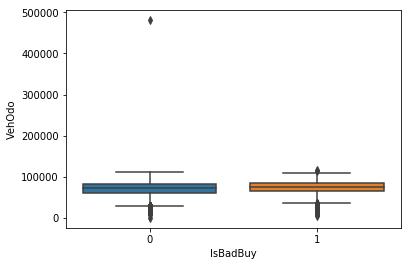

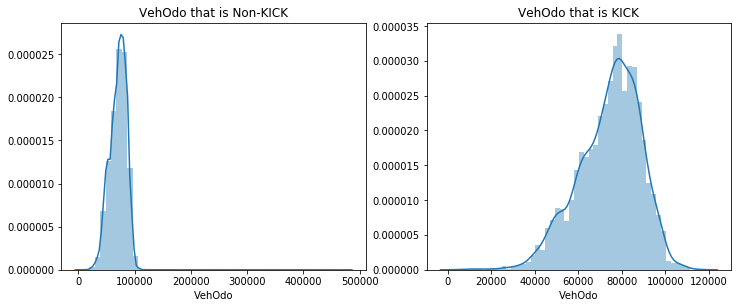

In [38]:
ax = sns.boxplot(x="IsBadBuy", y="VehOdo", data=df1)
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df1[df1['IsBadBuy']==0].VehOdo)
plt.title('VehOdo that is Non-KICK')

plt.subplot(222)
sns.distplot(df1[df1['IsBadBuy']==1].VehOdo)
plt.title('VehOdo that is KICK')

#### Nationality

In [39]:
print(df1['Nationality'].unique())

['AMERICAN' 'OTHER ASIAN' 'USA' 'TOP LINE ASIAN' 'OTHER' '?']


In [40]:
# replace '?' and 'USA' to 'AMERICAN'
df1['Nationality'] = df1['Nationality'].replace('?', 'AMERICAN')
df1['Nationality'] = df1['Nationality'].replace('USA', 'AMERICAN')
print(df1['Nationality'].unique())

['AMERICAN' 'OTHER ASIAN' 'TOP LINE ASIAN' 'OTHER']


D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
print(df1['Nationality'].value_counts())
print("\n\nNormalised count (percentage) of Nationality with kick value prediction")
print(df1.groupby(['IsBadBuy'])['Nationality'].value_counts(normalize=True))

AMERICAN          34744
OTHER ASIAN        4474
TOP LINE ASIAN     2110
OTHER               104
Name: Nationality, dtype: int64


Normalised count (percentage) of Nationality with kick value prediction
IsBadBuy  Nationality   
0         AMERICAN          0.840408
          OTHER ASIAN       0.106857
          TOP LINE ASIAN    0.050406
          OTHER             0.002329
1         AMERICAN          0.826281
          OTHER ASIAN       0.115564
          TOP LINE ASIAN    0.054427
          OTHER             0.003728
Name: Nationality, dtype: float64


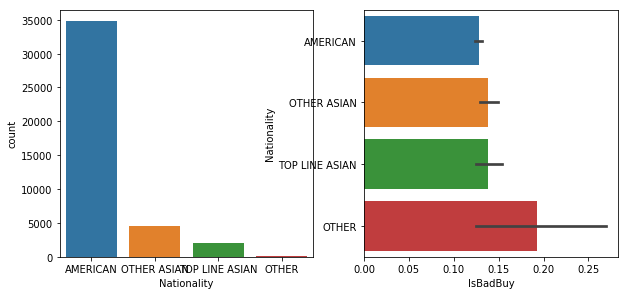

In [42]:
plt.figure(figsize=(10,10))
plt.subplot(221)
dg = sns.countplot(data=df1, x='Nationality')

plt.subplot(222)
dg = sns.barplot(data=df1, y='Nationality', x='IsBadBuy')

#### Size

In [43]:
print(df1['Size'].unique())

['MEDIUM' 'COMPACT' 'LARGE' 'MEDIUM SUV' 'SPECIALTY' 'CROSSOVER' 'VAN'
 'LARGE SUV' 'SMALL TRUCK' 'LARGE TRUCK' 'SMALL SUV' 'SPORTS' '?']


In [44]:
# replace '?' and 'USA' with 'AMERICAN'
df1['Size'] = df1['Size'].replace('?', 'MEDIUM')
print(df1['Size'].unique())

['MEDIUM' 'COMPACT' 'LARGE' 'MEDIUM SUV' 'SPECIALTY' 'CROSSOVER' 'VAN'
 'LARGE SUV' 'SMALL TRUCK' 'LARGE TRUCK' 'SMALL SUV' 'SPORTS']


D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [45]:
print(df1['Size'].value_counts())
print("\n\nNormalised count (percentage) of size with kick value prediction")
print(df1.groupby(['IsBadBuy'])['Size'].value_counts(normalize=True))

MEDIUM         17543
LARGE           4968
MEDIUM SUV      4569
COMPACT         4035
VAN             3367
LARGE TRUCK     1897
SMALL SUV       1332
SPECIALTY        998
CROSSOVER        974
LARGE SUV        830
SMALL TRUCK      494
SPORTS           425
Name: Size, dtype: int64


Normalised count (percentage) of size with kick value prediction
IsBadBuy  Size       
0         MEDIUM         0.427233
          LARGE          0.125405
          MEDIUM SUV     0.106552
          COMPACT        0.093132
          VAN            0.081044
          LARGE TRUCK    0.046081
          SMALL SUV      0.031636
          SPECIALTY      0.024870
          CROSSOVER      0.023845
          LARGE SUV      0.018965
          SMALL TRUCK    0.011617
          SPORTS         0.009621
1         MEDIUM         0.397763
          MEDIUM SUV     0.135322
          COMPACT        0.126002
          LARGE          0.082945
          VAN            0.082759
          LARGE TRUCK    0.043802
          SMALL SUV   

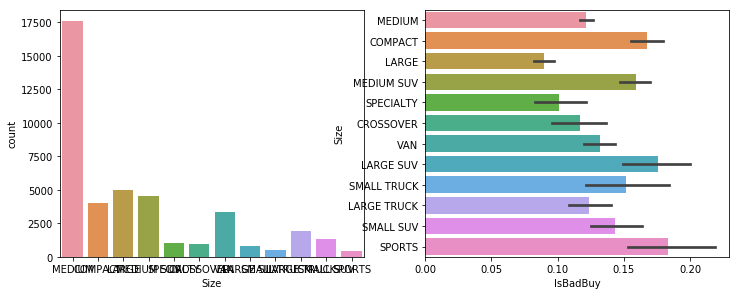

In [46]:
plt.figure(figsize=(12,10))
plt.subplot(221)
dg = sns.countplot(data=df1, x='Size', )
plt.subplot(222)
dg = sns.barplot(data=df1, y='Size', x='IsBadBuy', )

#### TopThreeAmericanName

In [47]:
print(df1['TopThreeAmericanName'].unique())
print(df1['TopThreeAmericanName'].value_counts())

['CHRYSLER' 'GM' 'OTHER' 'FORD' '?']
GM          14075
CHRYSLER    13627
FORD         7039
OTHER        6688
?               3
Name: TopThreeAmericanName, dtype: int64


In [48]:
# replace '?' with 'GM'
df1['TopThreeAmericanName'] = df1['TopThreeAmericanName'].replace('?', 'GM')
print(df1['TopThreeAmericanName'].unique())

['CHRYSLER' 'GM' 'OTHER' 'FORD']


D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [49]:
print(df1['TopThreeAmericanName'].value_counts())
print("\n\nNormalised count (percentage) of Nationality with kick value prediction")
print(df1.groupby(['IsBadBuy'])['TopThreeAmericanName'].value_counts(normalize=True))

GM          14078
CHRYSLER    13627
FORD         7039
OTHER        6688
Name: TopThreeAmericanName, dtype: int64


Normalised count (percentage) of Nationality with kick value prediction
IsBadBuy  TopThreeAmericanName
0         GM                      0.346938
          CHRYSLER                0.331356
          FORD                    0.162115
          OTHER                   0.159592
1         CHRYSLER                0.312395
          GM                      0.291705
          FORD                    0.222181
          OTHER                   0.173719
Name: TopThreeAmericanName, dtype: float64


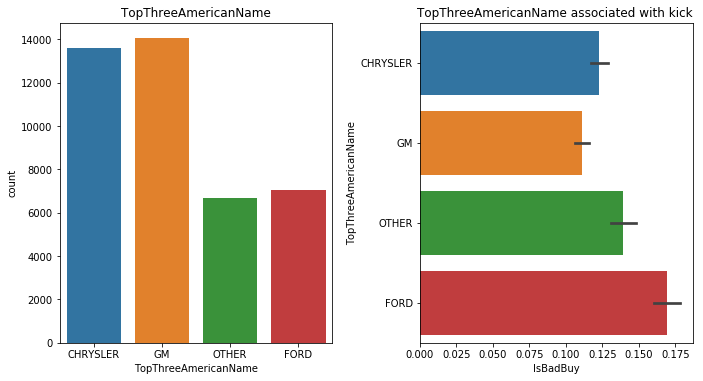

In [50]:
plt.figure(figsize=(10,10))
plt.subplot(221)
dg = sns.countplot(data=df1, x='TopThreeAmericanName',)
plt.title("TopThreeAmericanName")

plt.subplot(222)
dg = sns.barplot(data=df1, y='TopThreeAmericanName', x='IsBadBuy', )
plt.title("TopThreeAmericanName associated with kick ")
plt.tight_layout()

#### MMRAcquisitionAuctionAveragePrice

In [51]:
print(df1['MMRAcquisitionAuctionAveragePrice'].unique())
print(df1['MMRAcquisitionAuctionAveragePrice'].isnull().values.sum())

['8566' '8835' '7165' ... '9842' '1996' '7535']
16


In [52]:
# replace '?' with '0'
df1['MMRAcquisitionAuctionAveragePrice'] = df1['MMRAcquisitionAuctionAveragePrice'].replace('?', '0')
# convert data type from string to numeric
df1['MMRAcquisitionAuctionAveragePrice'] = pd.to_numeric(df1['MMRAcquisitionAuctionAveragePrice'])
df1['MMRAcquisitionAuctionAveragePrice'].unique()
# fill the missing value with the mean of the column
df1['MMRAcquisitionAuctionAveragePrice'] = df1['MMRAcquisitionAuctionAveragePrice'].fillna((df1['MMRAcquisitionAuctionAveragePrice'].mean()))
print(df1['MMRAcquisitionAuctionAveragePrice'].isnull().values.sum())

0


D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/i

In [53]:
print(df1['MMRAcquisitionAuctionAveragePrice'].value_counts(bins = 20))

(6708.6, 8385.75]      10153
(5031.45, 6708.6]       9710
(3354.3, 5031.45]       9224
(1677.15, 3354.3]       4840
(8385.75, 10062.9]      4436
(10062.9, 11740.05]     1769
(-33.544, 1677.15]       621
(11740.05, 13417.2]      443
(13417.2, 15094.35]      158
(15094.35, 16771.5]       48
(16771.5, 18448.65]        9
(18448.65, 20125.8]        9
(20125.8, 21802.95]        4
(26834.4, 28511.55]        3
(21802.95, 23480.1]        2
(31865.85, 33543.0]        2
(23480.1, 25157.25]        1
(30188.7, 31865.85]        0
(25157.25, 26834.4]        0
(28511.55, 30188.7]        0
Name: MMRAcquisitionAuctionAveragePrice, dtype: int64


Text(0.5,1,'MMRAcquisitionAuctionAveragePrice that is KICK')

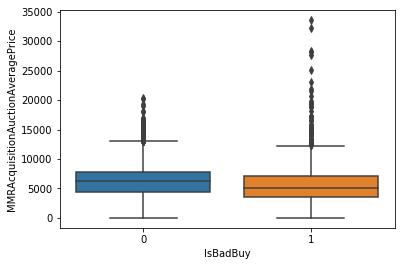

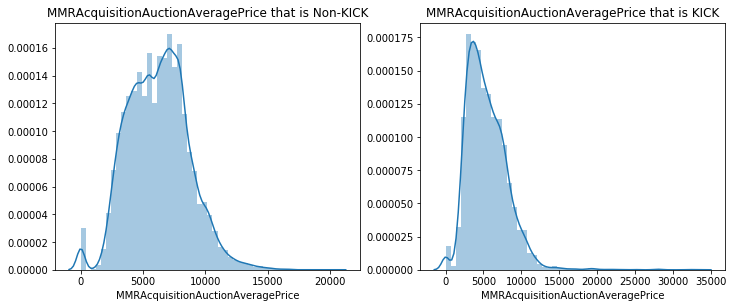

In [54]:
dg = sns.boxplot( x ='IsBadBuy', y ='MMRAcquisitionAuctionAveragePrice', data=df1)

plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df1[df1['IsBadBuy']==0].MMRAcquisitionAuctionAveragePrice)
plt.title('MMRAcquisitionAuctionAveragePrice that is Non-KICK')

plt.subplot(222)
sns.distplot(df1[df1['IsBadBuy']==1].MMRAcquisitionAuctionAveragePrice)
plt.title('MMRAcquisitionAuctionAveragePrice that is KICK')

#### MMRAcquisitionAuctionCleanPrice

In [55]:
print(df1['MMRAcquisitionAuctionCleanPrice'].unique())
print(df1['MMRAcquisitionAuctionCleanPrice'].isnull().values.sum())

['9325' '9428' '7770' ... '8757' '13568' '5714']
3


In [56]:
# replace '?' with '0'
df1['MMRAcquisitionAuctionCleanPrice'] = df1['MMRAcquisitionAuctionCleanPrice'].replace('?', '0')

# convert data type from string to numeric
df1['MMRAcquisitionAuctionCleanPrice'] = pd.to_numeric(df1['MMRAcquisitionAuctionCleanPrice'])
df1['MMRAcquisitionAuctionCleanPrice'].unique()

# fill the missing value with the mean of the column
df1['MMRAcquisitionAuctionCleanPrice'] = df1['MMRAcquisitionAuctionCleanPrice'].fillna((df1['MMRAcquisitionAuctionCleanPrice'].mean()))
print(df1['MMRAcquisitionAuctionCleanPrice'].isnull().values.sum())

0


D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-

In [57]:
print(df1['MMRAcquisitionAuctionCleanPrice'].value_counts(bins = 20))

(7340.2, 9175.25]      11086
(5505.15, 7340.2]      10028
(3670.1, 5505.15]       8179
(9175.25, 11010.3]      5569
(11010.3, 12845.35]     2644
(1835.05, 3670.1]       2154
(12845.35, 14680.4]      828
(-36.702, 1835.05]       525
(14680.4, 16515.45]      291
(16515.45, 18350.5]       84
(18350.5, 20185.55]       19
(20185.55, 22020.6]       13
(22020.6, 23855.65]        3
(23855.65, 25690.7]        3
(29360.8, 31195.85]        3
(34865.95, 36701.0]        2
(27525.75, 29360.8]        1
(33030.9, 34865.95]        0
(25690.7, 27525.75]        0
(31195.85, 33030.9]        0
Name: MMRAcquisitionAuctionCleanPrice, dtype: int64


Text(0.5,1,'MMRAcquisitionAuctionCleanPrice that is KICK')

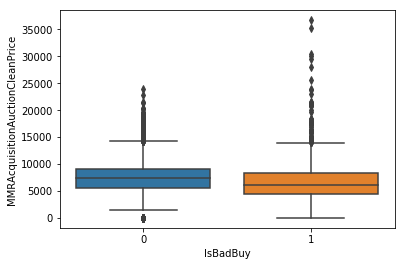

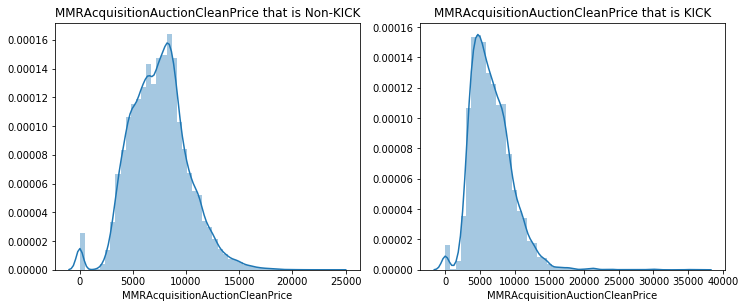

In [58]:
dg = sns.boxplot( x ='IsBadBuy', y ='MMRAcquisitionAuctionCleanPrice', data=df1)

plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df1[df1['IsBadBuy']==0].MMRAcquisitionAuctionCleanPrice)
plt.title('MMRAcquisitionAuctionCleanPrice that is Non-KICK')

plt.subplot(222)
sns.distplot(df1[df1['IsBadBuy']==1].MMRAcquisitionAuctionCleanPrice)
plt.title('MMRAcquisitionAuctionCleanPrice that is KICK')

MMRAcquisitionRetailAveragePrice

In [59]:
print(df1['MMRAcquisitionRetailAveragePrice'].unique())
print(df1['MMRAcquisitionRetailAveragePrice'].isnull().values.sum())

['9751' '10042' '8238' ... '2065' '5892' '2656']
3


In [60]:
# replace '?' with '0'
df1['MMRAcquisitionRetailAveragePrice'] = df1['MMRAcquisitionRetailAveragePrice'].replace('?', '0')

# convert data type from string to numeric
df1['MMRAcquisitionRetailAveragePrice'] = pd.to_numeric(df1['MMRAcquisitionRetailAveragePrice'])
df1['MMRAcquisitionRetailAveragePrice'].unique()

# fill the missing value with the mean of the column
df1['MMRAcquisitionRetailAveragePrice'] = df1['MMRAcquisitionRetailAveragePrice'].fillna((df1['MMRAcquisitionRetailAveragePrice'].mean()))
print(df1['MMRAcquisitionRetailAveragePrice'].isnull().values.sum())

0


D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-

In [61]:
print(df1['MMRAcquisitionAuctionAveragePrice'].value_counts(bins = 20))

(6708.6, 8385.75]      10153
(5031.45, 6708.6]       9710
(3354.3, 5031.45]       9224
(1677.15, 3354.3]       4840
(8385.75, 10062.9]      4436
(10062.9, 11740.05]     1769
(-33.544, 1677.15]       621
(11740.05, 13417.2]      443
(13417.2, 15094.35]      158
(15094.35, 16771.5]       48
(16771.5, 18448.65]        9
(18448.65, 20125.8]        9
(20125.8, 21802.95]        4
(26834.4, 28511.55]        3
(21802.95, 23480.1]        2
(31865.85, 33543.0]        2
(23480.1, 25157.25]        1
(30188.7, 31865.85]        0
(25157.25, 26834.4]        0
(28511.55, 30188.7]        0
Name: MMRAcquisitionAuctionAveragePrice, dtype: int64


Text(0.5,1,'MMRAcquisitionRetailAveragePrice that is KICK')

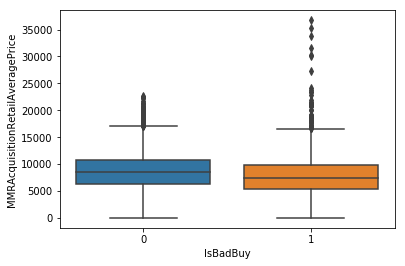

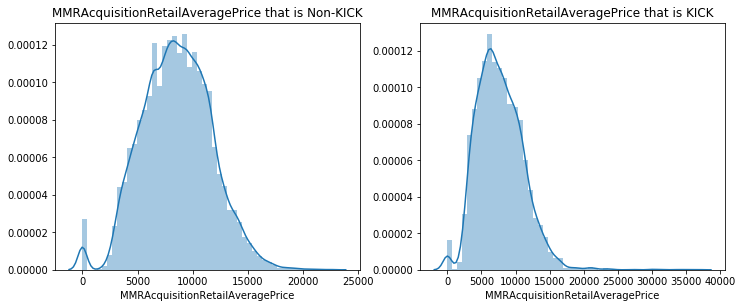

In [62]:
dg = sns.boxplot( x ='IsBadBuy', y ='MMRAcquisitionRetailAveragePrice', data=df1)

plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df1[df1['IsBadBuy']==0].MMRAcquisitionRetailAveragePrice)
plt.title('MMRAcquisitionRetailAveragePrice that is Non-KICK')

plt.subplot(222)
sns.distplot(df1[df1['IsBadBuy']==1].MMRAcquisitionRetailAveragePrice)
plt.title('MMRAcquisitionRetailAveragePrice that is KICK')

####  MMRAcquisitonRetailCleanPrice

In [63]:
print(df1['MMRAcquisitonRetailCleanPrice'].unique())
print(df1['MMRAcquisitonRetailCleanPrice'].isnull().values.sum())

['10571' '10682' '8892' ... '6107' '6967' '4937']
105


In [64]:
# replace '?' with '0'
df1['MMRAcquisitonRetailCleanPrice'] = df1['MMRAcquisitonRetailCleanPrice'].replace('?', '0')

# convert data type from string to numeric
df1['MMRAcquisitonRetailCleanPrice'] = pd.to_numeric(df1['MMRAcquisitonRetailCleanPrice'])
df1['MMRAcquisitonRetailCleanPrice'].unique()

# fill the missing value with the mean of the column
df1['MMRAcquisitonRetailCleanPrice'] = df1['MMRAcquisitonRetailCleanPrice'].fillna((df1['MMRAcquisitonRetailCleanPrice'].mean()))
print(df1['MMRAcquisitionAuctionCleanPrice'].isnull().values.sum())

0


D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-

In [65]:
print(df1['MMRAcquisitionAuctionCleanPrice'].value_counts(bins = 20))

(7340.2, 9175.25]      11086
(5505.15, 7340.2]      10028
(3670.1, 5505.15]       8179
(9175.25, 11010.3]      5569
(11010.3, 12845.35]     2644
(1835.05, 3670.1]       2154
(12845.35, 14680.4]      828
(-36.702, 1835.05]       525
(14680.4, 16515.45]      291
(16515.45, 18350.5]       84
(18350.5, 20185.55]       19
(20185.55, 22020.6]       13
(22020.6, 23855.65]        3
(23855.65, 25690.7]        3
(29360.8, 31195.85]        3
(34865.95, 36701.0]        2
(27525.75, 29360.8]        1
(33030.9, 34865.95]        0
(25690.7, 27525.75]        0
(31195.85, 33030.9]        0
Name: MMRAcquisitionAuctionCleanPrice, dtype: int64


Text(0.5,1,'MMRAcquisitonRetailCleanPrice that is KICK')

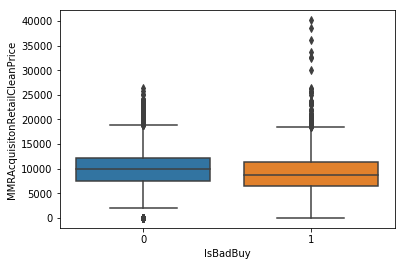

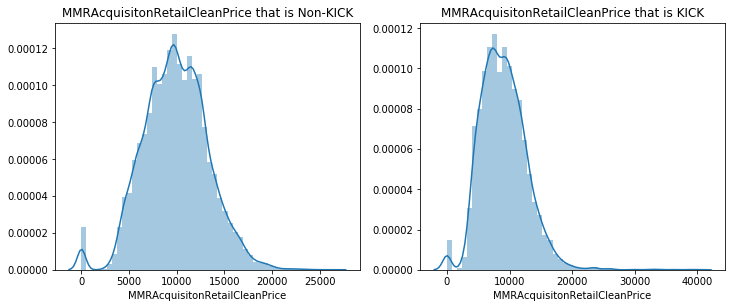

In [66]:
dg = sns.boxplot( x ='IsBadBuy', y ='MMRAcquisitonRetailCleanPrice', data=df1)

plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df1[df1['IsBadBuy']==0].MMRAcquisitonRetailCleanPrice)
plt.title('MMRAcquisitonRetailCleanPrice that is Non-KICK')

plt.subplot(222)
sns.distplot(df1[df1['IsBadBuy']==1].MMRAcquisitonRetailCleanPrice)
plt.title('MMRAcquisitonRetailCleanPrice that is KICK')

####  MMRCurrentAuctionAveragePrice

In [67]:
print(df1['MMRCurrentAuctionAveragePrice'].unique())
print(df1['MMRCurrentAuctionAveragePrice'].isnull().values.sum())

['7781' '8568' '8137' ... '2062' '13646' '7730']
3


In [68]:
# replace '?' with '0'
df1['MMRCurrentAuctionAveragePrice'] = df1['MMRCurrentAuctionAveragePrice'].replace('?', '0')

# convert data type from string to numeric
df1['MMRCurrentAuctionAveragePrice'] = pd.to_numeric(df1['MMRCurrentAuctionAveragePrice'])
df1['MMRCurrentAuctionAveragePrice'].unique()

# fill the missing value with the mean of the column
df1['MMRCurrentAuctionAveragePrice'] = df1['MMRCurrentAuctionAveragePrice'].fillna((df1['MMRCurrentAuctionAveragePrice'].mean()))
print(df1['MMRCurrentAuctionAveragePrice'].isnull().values.sum())

0


D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-

In [69]:
print(df1['MMRCurrentAuctionAveragePrice'].value_counts(bins = 20))

(6673.8, 8342.25]      10050
(5005.35, 6673.8]       9784
(3336.9, 5005.35]       9199
(1668.45, 3336.9]       4795
(8342.25, 10010.7]      4475
(10010.7, 11679.15]     1820
(-33.37, 1668.45]        599
(11679.15, 13347.6]      463
(13347.6, 15016.05]      169
(15016.05, 16684.5]       48
(16684.5, 18352.95]       14
(18352.95, 20021.4]        7
(21689.85, 23358.3]        3
(26695.2, 28363.65]        3
(31700.55, 33369.0]        2
(20021.4, 21689.85]        1
(30032.1, 31700.55]        0
(23358.3, 25026.75]        0
(25026.75, 26695.2]        0
(28363.65, 30032.1]        0
Name: MMRCurrentAuctionAveragePrice, dtype: int64


Text(0.5,1,'MMRCurrentAuctionAveragePrice that is KICK')

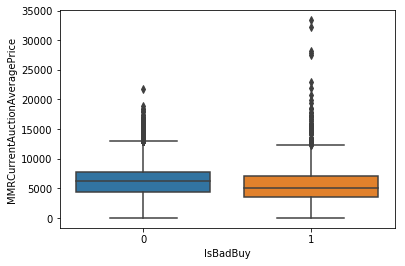

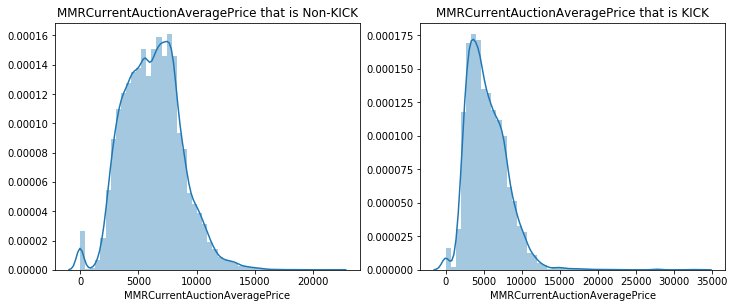

In [70]:
dg = sns.boxplot( x ='IsBadBuy', y ='MMRCurrentAuctionAveragePrice', data=df1)

plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df1[df1['IsBadBuy']==0].MMRCurrentAuctionAveragePrice)
plt.title('MMRCurrentAuctionAveragePrice that is Non-KICK')

plt.subplot(222)
sns.distplot(df1[df1['IsBadBuy']==1].MMRCurrentAuctionAveragePrice)
plt.title('MMRCurrentAuctionAveragePrice that is KICK')

#### MMRCurrentAuctionCleanPrice

In [71]:
print(df1['MMRCurrentAuctionCleanPrice'].unique())
print(df1['MMRCurrentAuctionCleanPrice'].isnull().values.sum())

['8545' '9325' '8733' ... '13262' '11424' '15015']
3


In [72]:
df1['MMRCurrentAuctionCleanPrice'] = df1['MMRCurrentAuctionCleanPrice'].replace('?', '0')

# convert data type from string to numeric
df1['MMRCurrentAuctionCleanPrice'] = pd.to_numeric(df1['MMRCurrentAuctionCleanPrice'])
df1['MMRCurrentAuctionCleanPrice'].unique()

# fill the missing value with the mean of the column
df1['MMRCurrentAuctionCleanPrice'] = df1['MMRCurrentAuctionCleanPrice'].fillna((df1['MMRCurrentAuctionCleanPrice'].mean()))
print(df1['MMRCurrentAuctionCleanPrice'].isnull().values.sum())

0


D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [73]:
print(df1['MMRCurrentAuctionCleanPrice'].value_counts(bins = 20))

(7295.6, 9119.5]      10954
(5471.7, 7295.6]       9992
(3647.8, 5471.7]       8062
(9119.5, 10943.4]      5878
(10943.4, 12767.3]     2636
(1823.9, 3647.8]       2110
(12767.3, 14591.2]      871
(-36.479, 1823.9]       497
(14591.2, 16415.1]      293
(16415.1, 18239.0]       96
(18239.0, 20062.9]       23
(20062.9, 21886.8]       12
(25534.6, 27358.5]        2
(29182.4, 31006.3]        2
(34654.1, 36478.0]        2
(23710.7, 25534.6]        1
(27358.5, 29182.4]        1
(32830.2, 34654.1]        0
(21886.8, 23710.7]        0
(31006.3, 32830.2]        0
Name: MMRCurrentAuctionCleanPrice, dtype: int64


Text(0.5,1,'MMRCurrentAuctionCleanPrice that is KICK')

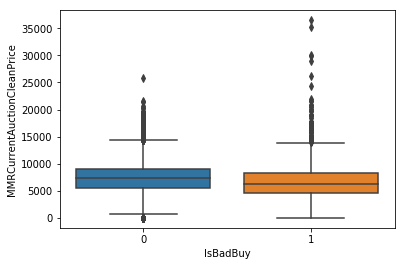

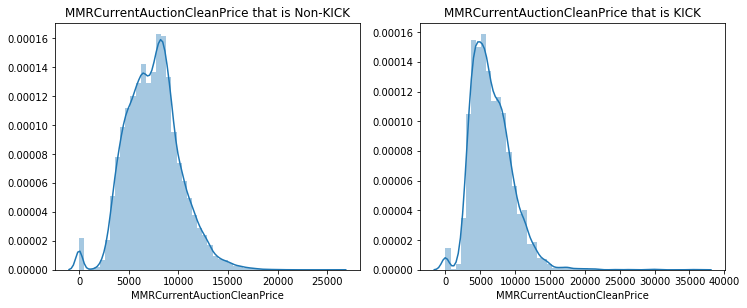

In [74]:
dg = sns.boxplot( x ='IsBadBuy', y ='MMRCurrentAuctionCleanPrice', data=df1)

plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df1[df1['IsBadBuy']==0].MMRCurrentAuctionCleanPrice)
plt.title('MMRCurrentAuctionCleanPrice that is Non-KICK')

plt.subplot(222)
sns.distplot(df1[df1['IsBadBuy']==1].MMRCurrentAuctionCleanPrice)
plt.title('MMRCurrentAuctionCleanPrice that is KICK')

####  MMRCurrentRetailAveragePrice

In [75]:
print(df1['MMRAcquisitionAuctionAveragePrice'].unique())
print(df1['MMRCurrentRetailAveragePrice'].isnull().values.sum())

[8566. 8835. 7165. ... 9842. 1996. 7535.]
23


In [76]:
# replace '?' with '0'
df1['MMRCurrentRetailAveragePrice'] = df1['MMRCurrentRetailAveragePrice'].replace('?', '0')

# convert data type from string to numeric
df1['MMRCurrentRetailAveragePrice'] = pd.to_numeric(df1['MMRCurrentRetailAveragePrice'])
df1['MMRCurrentRetailAveragePrice'].unique()

# fill the missing value with the mean of the column
df1['MMRCurrentRetailAveragePrice'] = df1['MMRCurrentRetailAveragePrice'].fillna((df1['MMRCurrentRetailAveragePrice'].mean()))
print(df1['MMRCurrentRetailAveragePrice'].isnull().values.sum())

0


D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-

In [77]:
print(df1['MMRCurrentRetailAveragePrice'].value_counts(bins = 20))

(7307.8, 9134.75]      8791
(9134.75, 10961.7]     8508
(5480.85, 7307.8]      7611
(10961.7, 12788.65]    6346
(3653.9, 5480.85]      4531
(12788.65, 14615.6]    2559
(1826.95, 3653.9]      1353
(14615.6, 16442.55]     903
(-36.54, 1826.95]       490
(16442.55, 18269.5]     239
(18269.5, 20096.45]      60
(20096.45, 21923.4]      21
(21923.4, 23750.35]       9
(23750.35, 25577.3]       4
(34712.05, 36539.0]       2
(32885.1, 34712.05]       1
(25577.3, 27404.25]       1
(27404.25, 29231.2]       1
(29231.2, 31058.15]       1
(31058.15, 32885.1]       1
Name: MMRCurrentRetailAveragePrice, dtype: int64


Text(0.5,1,'MMRCurrentRetailAveragePrice that is KICK')

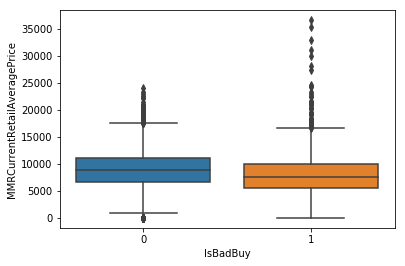

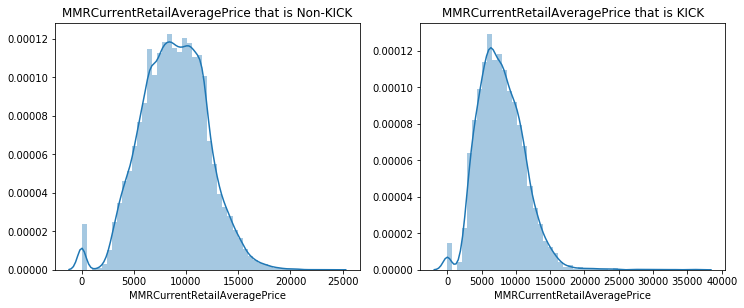

In [78]:
dg = sns.boxplot( x ='IsBadBuy', y ='MMRCurrentRetailAveragePrice', data=df1)

plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df1[df1['IsBadBuy']==0].MMRCurrentRetailAveragePrice)
plt.title('MMRCurrentRetailAveragePrice that is Non-KICK')

plt.subplot(222)
sns.distplot(df1[df1['IsBadBuy']==1].MMRCurrentRetailAveragePrice)
plt.title('MMRCurrentRetailAveragePrice that is KICK')

MMRCurrentRetailCleanPrice

In [79]:
print(df1['MMRCurrentRetailCleanPrice'].unique())
print(df1['MMRCurrentRetailCleanPrice'].isnull().values.sum())

['12505' '10571' '9932' ... '17702' '19161' '14402']
23


In [80]:
# replace '?' with '0'
df1['MMRCurrentRetailCleanPrice'] = df1['MMRCurrentRetailCleanPrice'].replace('?', '0')

# convert data type from string to numeric
df1['MMRCurrentRetailCleanPrice'] = pd.to_numeric(df1['MMRCurrentRetailCleanPrice'])
df1['MMRCurrentRetailCleanPrice'].unique()

# fill the missing value with the mean of the column
df1['MMRCurrentRetailCleanPrice'] = df1['MMRCurrentRetailCleanPrice'].fillna((df1['MMRCurrentRetailCleanPrice'].mean()))
print(df1['MMRCurrentRetailCleanPrice'].isnull().values.sum())

0


D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-

In [81]:
print(df1['MMRCurrentRetailCleanPrice'].value_counts(bins = 20))

(9974.0, 11968.8]     9335
(7979.2, 9974.0]      8933
(11968.8, 13963.6]    7029
(5984.4, 7979.2]      6962
(3989.6, 5984.4]      3438
(13963.6, 15958.4]    3082
(15958.4, 17953.2]    1211
(-39.897, 1994.8]      480
(1994.8, 3989.6]       468
(17953.2, 19948.0]     340
(19948.0, 21942.8]      99
(21942.8, 23937.6]      31
(23937.6, 25932.4]      12
(25932.4, 27927.2]       4
(29922.0, 31916.8]       3
(37901.2, 39896.0]       2
(27927.2, 29922.0]       1
(31916.8, 33911.6]       1
(33911.6, 35906.4]       1
(35906.4, 37901.2]       0
Name: MMRCurrentRetailCleanPrice, dtype: int64


Text(0.5,1,'Market clean price that is KICK')

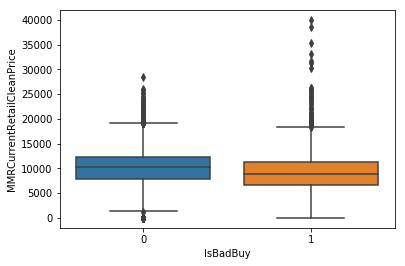

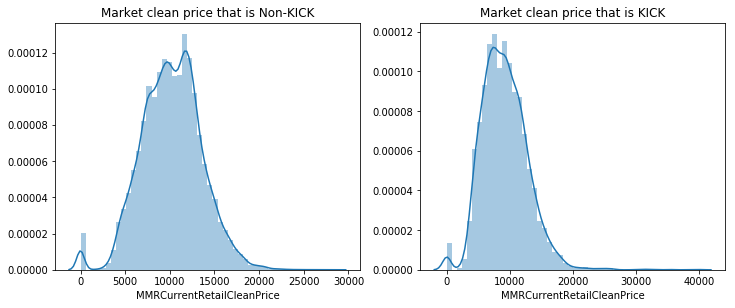

In [82]:
dg = sns.boxplot( x ='IsBadBuy', y ='MMRCurrentRetailCleanPrice', data=df1)
#plt.show()

plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df1[df1['IsBadBuy']==0].MMRCurrentRetailCleanPrice)
plt.title('Market clean price that is Non-KICK')

plt.subplot(222)
sns.distplot(df1[df1['IsBadBuy']==1].MMRCurrentRetailCleanPrice)
plt.title('Market clean price that is KICK')

#### MMRCurrentRetailRatio

In [83]:
print(df1['MMRCurrentRetailRatio'].unique())
print(df1['MMRCurrentRetailRatio'].isnull().values.sum())

['0.941783287' '0.922618485' '0.935159082' ... '0.814552804' '0.821483127'
 '0.90246112']
316


In [84]:
# replace '?' with '0'
df1['MMRCurrentRetailRatio'] = df1['MMRCurrentRetailRatio'].replace('#VALUE!', '0')

# convert data type from string to numeric
df1['MMRCurrentRetailRatio'] = pd.to_numeric(df1['MMRCurrentRetailRatio'])
df1['MMRCurrentRetailRatio'].unique()

# fill the missing value with the mean of the column
df1['MMRCurrentRetailRatio'] = df1['MMRCurrentRetailRatio'].fillna((df1['MMRCurrentRetailRatio'].mean()))
print (df1['MMRCurrentRetailRatio'].isnull().values.sum())

0


D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-

In [85]:
print(df1['MMRCurrentRetailRatio'].value_counts(bins = 20))

(0.85, 0.9]       16540
(0.8, 0.85]       10919
(0.9, 0.95]        7485
(0.75, 0.8]        4278
(0.7, 0.75]        1174
(0.95, 1.0]         694
(-0.002, 0.05]      178
(0.65, 0.7]         126
(0.6, 0.65]          28
(0.55, 0.6]           9
(0.35, 0.4]           1
(0.5, 0.55]           0
(0.4, 0.45]           0
(0.3, 0.35]           0
(0.25, 0.3]           0
(0.2, 0.25]           0
(0.15, 0.2]           0
(0.1, 0.15]           0
(0.05, 0.1]           0
(0.45, 0.5]           0
Name: MMRCurrentRetailRatio, dtype: int64


Text(0.5,1,'MMRCurrentRetailRatio  that is KICK')

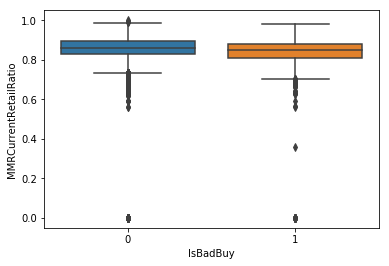

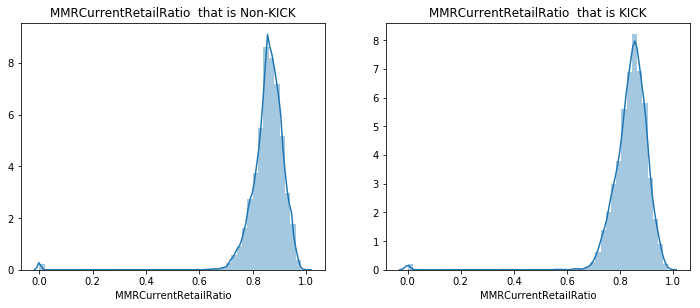

In [86]:
dg = sns.boxplot( x ='IsBadBuy', y ='MMRCurrentRetailRatio', data=df1)


plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df1[df1['IsBadBuy']==0].MMRCurrentRetailRatio)
plt.title('MMRCurrentRetailRatio  that is Non-KICK')

plt.subplot(222)
sns.distplot(df1[df1['IsBadBuy']==1].MMRCurrentRetailRatio)
plt.title('MMRCurrentRetailRatio  that is KICK')


#### PRIMEUNIT 

In [87]:
print(df1['PRIMEUNIT'].unique())
print(df1['PRIMEUNIT'].value_counts())

['?' 'NO' 'YES']
?      39634
NO      1764
YES       34
Name: PRIMEUNIT, dtype: int64


####  AUCGUART

In [88]:
print(df1['AUCGUART'].unique())
print(df1['AUCGUART'].value_counts())

['?' 'GREEN' 'RED']
?        39634
GREEN     1754
RED         44
Name: AUCGUART, dtype: int64


#### VNST 

In [89]:
print(df1['VNST'].unique())

['NC' 'CA' 'TX' 'FL' 'NV' 'CO' 'NM' 'LA' 'SC' 'WV' 'TN' 'OH' 'VA' 'IN'
 'GA' 'IL' 'AZ' 'PA' 'MO' 'AL' 'MS' 'WA' 'ID' 'OK' 'NH' 'NJ' 'NY' 'NE'
 'OR' 'KY' 'UT']


In [90]:
print(df1['VNST'].value_counts())
print("\n\nNormalised count (percentage) of VNST with kick value prediction")
print(df1.groupby(['IsBadBuy'])['VNST'].value_counts(normalize=True))

TX    9076
FL    5250
CO    3623
NC    3594
AZ    3383
CA    3268
OK    2595
SC    1662
TN    1471
GA    1287
VA    1093
MO     758
PA     700
NV     553
IN     486
MS     412
LA     349
NJ     317
NM     239
KY     230
AL     179
IL     165
UT     165
WV     137
OR     136
WA     136
NH      97
NE      26
OH      25
ID      14
NY       6
Name: VNST, dtype: int64


Normalised count (percentage) of VNST with kick value prediction
IsBadBuy  VNST
0         TX      0.216819
          FL      0.127956
          CO      0.088197
          NC      0.086644
          AZ      0.080572
          CA      0.076219
          OK      0.064713
          SC      0.041090
          TN      0.035878
          GA      0.031441
          VA      0.026090
          MO      0.018743
          PA      0.015887
          NV      0.012837
          IN      0.011590
          MS      0.010259
          LA      0.008235
          NJ      0.007680
          KY      0.005961
          NM      0.005822
          AL

Text(0.5,1,'VNST associated with kick ')

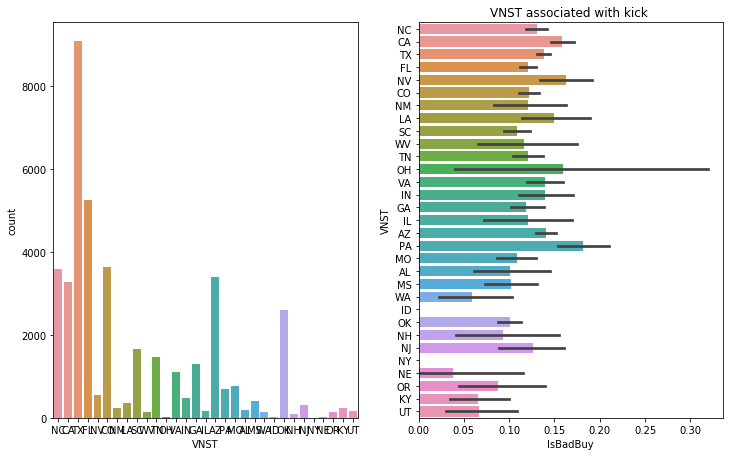

In [91]:
plt.figure(figsize=(12,16))
plt.subplot(221)
dg = sns.countplot(data=df1, x='VNST')

plt.subplot(222)
dg = sns.barplot(data=df1, y='VNST', x='IsBadBuy', )
plt.title("VNST associated with kick ")

#### VehBCost

In [92]:
df1['VehBCost'].unique()

array(['7800', '6000', '7500', ..., '10885', '11945', '3205'],
      dtype=object)

In [93]:
# replace '?' with '0'
df1['VehBCost'] = df1['VehBCost'].replace('?', '0')
# convert data type from string to numeric
df1['VehBCost'] = pd.to_numeric(df1['VehBCost'])
df1['VehBCost'].unique()

D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


array([ 7800,  6000,  7500, ..., 10885, 11945,  3205], dtype=int64)

Text(0.5,1,'Purchase cost that is KICK')

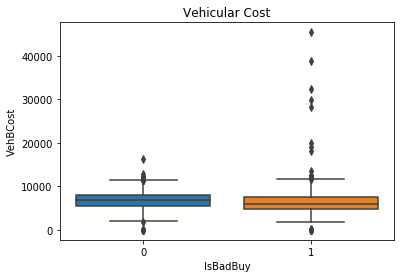

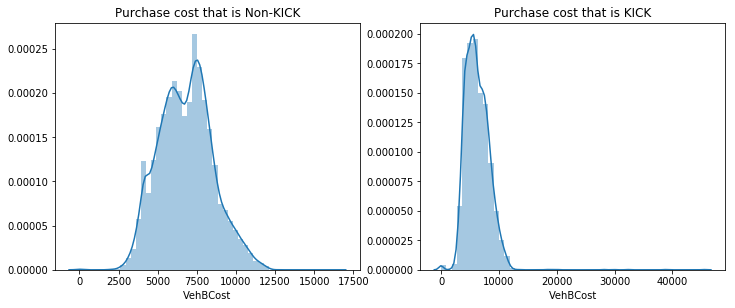

In [94]:
dg = sns.boxplot( x ='IsBadBuy', y ='VehBCost', data=df1).set_title('Vehicular Cost')

# create discplots to sepate kick and non kick in terms of vehicular cost 
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df1[df1['IsBadBuy']==0].VehBCost)
plt.title('Purchase cost that is Non-KICK')

plt.subplot(222)
sns.distplot(df1[df1['IsBadBuy']==1].VehBCost)
plt.title('Purchase cost that is KICK')

#### IsOnlineSale 

In [95]:
print(df1['IsOnlineSale'].unique())
print(df1['IsOnlineSale'].value_counts())

[0.0 -1.0 2.0 4.0 1.0 '0' '1' '?']
0.0     31368
0        8572
1.0       753
-1.0      601
1         134
?           2
4.0         1
2.0         1
Name: IsOnlineSale, dtype: int64


In [96]:
# replace '?' with '0'
df1['IsOnlineSale'] = df1['IsOnlineSale'].replace( '0.0', 0)
df1['IsOnlineSale'] = df1['IsOnlineSale'].replace('?', 0)
df1['IsOnlineSale'] = df1['IsOnlineSale'].replace(-1.0, 1)
df1['IsOnlineSale'] = df1['IsOnlineSale'].replace( 2.0, 0)
df1['IsOnlineSale'] = df1['IsOnlineSale'].replace( 4.0, 0)
df1['IsOnlineSale'] = df1['IsOnlineSale'].replace( '0', 0)
df1['IsOnlineSale'] = df1['IsOnlineSale'].replace( '1', 1)
df1['IsOnlineSale'] = df1['IsOnlineSale'].replace( 0.0, '0')
df1['IsOnlineSale'] = df1['IsOnlineSale'].replace( 1.0, '1')
print(df1['IsOnlineSale'].value_counts())

D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

0    39944
1     1488
Name: IsOnlineSale, dtype: int64


D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [97]:
# convert data type from string to numeric
df1['IsOnlineSale'] = pd.Categorical(df1['IsOnlineSale'])
print(df1['IsOnlineSale'].unique())
print(df1['IsOnlineSale'].value_counts())

[0, 1]
Categories (2, object): [0, 1]
0    39944
1     1488
Name: IsOnlineSale, dtype: int64


D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [98]:
print("\n\nNormalised count (percentage) of IsOnlineSale with kick value prediction")
print(df1.groupby(['IsBadBuy'])['IsOnlineSale'].value_counts(normalize=True))



Normalised count (percentage) of IsOnlineSale with kick value prediction
IsBadBuy  IsOnlineSale
0         0               0.963734
          1               0.036266
1         0               0.966449
          1               0.033551
Name: IsOnlineSale, dtype: float64


Text(0.5,1,'IsOnlineSale associated with kick ')

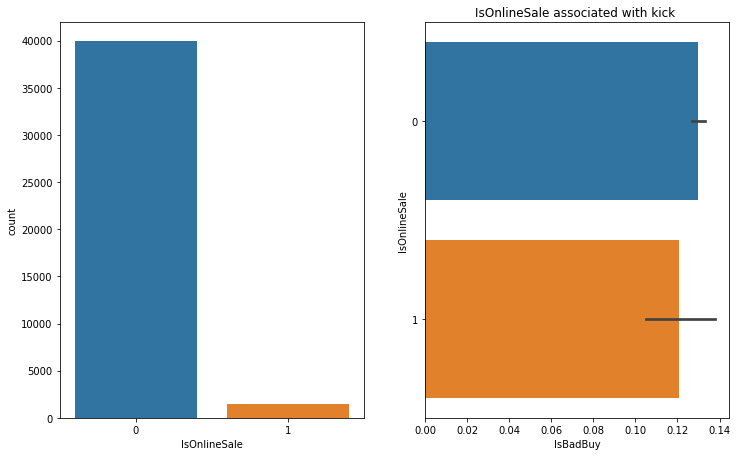

In [99]:
plt.figure(figsize=(12,16))
plt.subplot(221)
dg = sns.countplot(data=df1, x='IsOnlineSale')

plt.subplot(222)
dg = sns.barplot(data=df1, y='IsOnlineSale', x='IsBadBuy', )
plt.title("IsOnlineSale associated with kick ")

#### WarrantyCost

In [100]:
print(df1['WarrantyCost'].unique())

[ 920.  834.  671. 1500.  505. 1703.  837. 1003.  762.  975. 1328.  482.
 1181. 1155.  533.  905. 1215.  623. 1086.  754.  728. 1020.  693. 2282.
  825. 3667. 1740.  882. 1623. 1763.  462. 1118. 1485. 1220.  983.  569.
  853. 1272.  764. 1506. 1806. 1113. 1373. 2152.  582. 1503.  923.  686.
  594. 1053.  803. 1413. 1243. 1918. 2712.  588.  723. 2274.  833. 1389.
  630. 1633.  894. 1613. 2351. 1251. 1974. 1923. 1630.  810. 1450. 1341.
 1205. 1543. 1933. 1169. 1411. 1125. 4032. 2022. 2003.  930. 1551. 1785.
 1606. 1497. 2091. 4210. 2452. 1666. 1103.  765.  986. 3415. 1153. 1134.
 1283. 2412. 2506. 1455. 2063.  620. 2322.  869. 4922.  888. 1320. 1313.
 1711. 1023. 1038. 1137. 1803. 2208. 1801. 4622. 3910. 1893. 2495.  909.
 1197. 1808.  941. 1046. 1418. 1028. 1346.  553. 1800. 1641. 2391. 4982.
 2218. 1898. 1689. 1857. 1774. 1065. 1634. 2508. 2582. 2651. 2198. 2735.
  822. 1386. 1353. 5392. 1508. 2074. 3115.  642. 1430.  970.  805. 1515.
 1469. 1054. 1223. 1572. 1062. 2157. 1334. 2639. 13

In [101]:
print(df1['WarrantyCost'].value_counts(bins=20))

(813.8, 1165.6]     11820
(1165.6, 1517.4]     9601
(454.963, 813.8]     9029
(1517.4, 1869.2]     4760
(1869.2, 2221.0]     4456
(2221.0, 2572.8]     1063
(2572.8, 2924.6]      251
(2924.6, 3276.4]       97
(3628.2, 3980.0]       74
(4331.8, 4683.6]       61
(5387.2, 5739.0]       51
(3980.0, 4331.8]       44
(5035.4, 5387.2]       41
(4683.6, 5035.4]       37
(5739.0, 6090.8]       24
(3276.4, 3628.2]       17
(6794.4, 7146.2]        2
(7146.2, 7498.0]        2
(6090.8, 6442.6]        1
(6442.6, 6794.4]        1
Name: WarrantyCost, dtype: int64


Text(0.5,1,'WarrantyCost that is KICK')

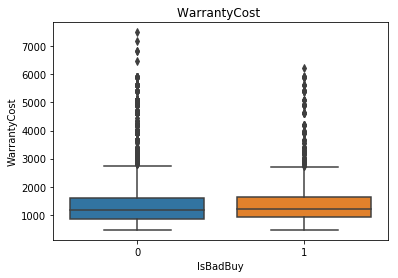

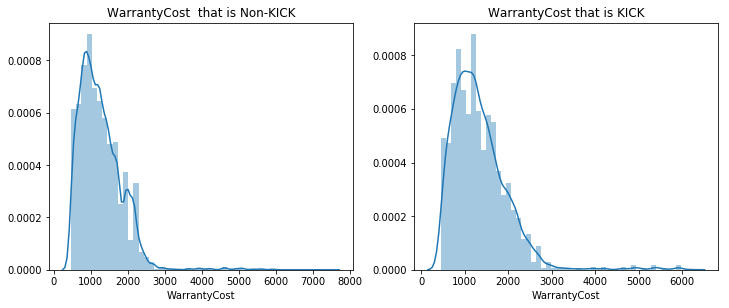

In [102]:
dg = sns.boxplot( x ='IsBadBuy', y ='WarrantyCost', data=df1).set_title('WarrantyCost ')

# create discplots to sepate kick and non kick in terms of vehicular cost 
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df1[df1['IsBadBuy']==0].WarrantyCost)
plt.title('WarrantyCost  that is Non-KICK')

plt.subplot(222)
sns.distplot(df1[df1['IsBadBuy']==1].WarrantyCost)
plt.title('WarrantyCost that is KICK')

#### ForSale 

In [103]:
print(df1['ForSale'].unique())
print(df1['ForSale'].value_counts())

['Yes' 'No' '?' 'yes' '0' 'YES']
Yes    27358
YES     8544
yes     5524
?          3
No         2
0          1
Name: ForSale, dtype: int64


In [104]:
# replace noisy
df1['ForSale'] = df1['ForSale'].replace('yes', 'Yes')
df1['ForSale'] = df1['ForSale'].replace('YES', 'Yes')
df1['ForSale'] = df1['ForSale'].replace('?', 'Yes')
df1['ForSale'] = df1['ForSale'].replace('0', 'No')
print(df1['ForSale'].unique())
print(df1['ForSale'].value_counts())

D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

['Yes' 'No']
Yes    41429
No         3
Name: ForSale, dtype: int64


In [105]:
print("\n\nNormalised count (percentage) of ForSale with kick value prediction")
print(df1.groupby(['IsBadBuy'])['ForSale'].value_counts(normalize=True))



Normalised count (percentage) of ForSale with kick value prediction
IsBadBuy  ForSale
0         Yes        0.999917
          No         0.000083
1         Yes        1.000000
Name: ForSale, dtype: float64


Text(0.5,1,'ForSale associated with kick ')

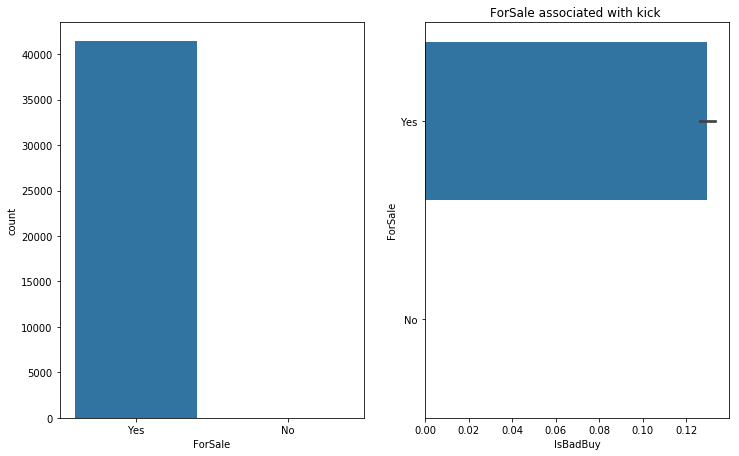

In [106]:
plt.figure(figsize=(12,16))
plt.subplot(221)
dg = sns.countplot(data=df1, x='ForSale')

plt.subplot(222)
dg = sns.barplot(data=df1, y='ForSale', x='IsBadBuy', )
plt.title("ForSale associated with kick ")

#### IsBadBuy 

In [107]:
print(df1['IsBadBuy'].unique())
print(df1['IsBadBuy'].value_counts())

[0 1]
0    36067
1     5365
Name: IsBadBuy, dtype: int64


Text(0.5,1,'Percentage of Kick')

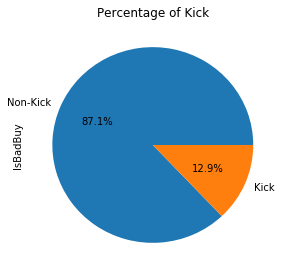

In [108]:
labels = 'Non-Kick' , 'Kick'
df1['IsBadBuy'].value_counts().plot.pie(figsize = (4.5,4.5), labels = labels,  autopct='%1.1f%%',).set_title('Percentage of Kick')
#plt.show()

Check Data preprocessing result

In [ ]:
MissingData = df1.isnull().sum()
#print(MissingData.sort_values(ascending = False))